### **Feature Creation**


**Techniques tried:**

Standard scaling is the only one I found that worked.

Also tried polynomial factoring or whatever.

Tried PCA.

Tried bucketing. Try bucketing with high-variance features. Use metrics to find the most-binnable feature or features.

Tried removing outliers at a variety of z-scores.

Data augmentation didn’t make worse, but also didn’t improve.


In [ ]:
#Let's perform a super simple and easy Random Forest Classifier.
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Selecting the features and target
features = data[['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']]
target = data['Good']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

accuracy


0.89625

In [ ]:
#I bet I can get that accuracy to 95%. Let's do some feature engineering.

In [ ]:
#Let's just look at what it's doing. In the first five rows, it got a false negative (wrongly predicted a good apple as a bad apple).
#More false negatives could mean wasting money that shouldn't be wasted. False positives could mean customers get bad apples, which of course could hurt the brand, and cost lots of money in the long run.
#If we have to choose between the two, throwing out a few good apples would probably be preferable to selling the same number of bad apples to customers.
print(model.predict(X_train.iloc[0:5]))

[1 1 0 0 1]


In [ ]:
from sklearn.metrics import confusion_matrix
#Let's calculate false positives vs false negatives.

conf_matrix = confusion_matrix(y_test, y_pred)

false_positive = conf_matrix[0][1]
false_negative = conf_matrix[1][0]

print(f"False Positives: {false_positive}")
print(f"False Negatives: {false_negative}")

False Positives: 45
False Negatives: 38


In [ ]:
#Ok, so there's not a wild imbalance in terms of false positives vs false negatives. That's probably good.
#Let's try to find the most unpredictable feature, and see if we can get higher accuracy be getting rid of it.



In [ ]:
#Hypotheses: Size and weight are probably positively correlated.
#I think acidity and ripeness are inversely correlated. The riper it is, the less acidic.
#Let's see what the data says.

correlation_matrix = data[['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']].corr()
print(correlation_matrix)

                 Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
Size         1.000000 -0.170702  -0.324680     0.169868  -0.018892 -0.134773   
Weight      -0.170702  1.000000  -0.154246    -0.095882  -0.092263 -0.243824   
Sweetness   -0.324680 -0.154246   1.000000    -0.037552   0.095882 -0.273800   
Crunchiness  0.169868 -0.095882  -0.037552     1.000000  -0.259607 -0.201982   
Juiciness   -0.018892 -0.092263   0.095882    -0.259607   1.000000 -0.097144   
Ripeness    -0.134773 -0.243824  -0.273800    -0.201982  -0.097144  1.000000   
Acidity      0.196218  0.016414   0.085999     0.069943   0.248714 -0.202669   

              Acidity  
Size         0.196218  
Weight       0.016414  
Sweetness    0.085999  
Crunchiness  0.069943  
Juiciness    0.248714  
Ripeness    -0.202669  
Acidity      1.000000  


In [ ]:

correlation_matrix = data[['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity', 'Good']].corr()
print(correlation_matrix)

                 Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
Size         1.000000 -0.170702  -0.324680     0.169868  -0.018892 -0.134773   
Weight      -0.170702  1.000000  -0.154246    -0.095882  -0.092263 -0.243824   
Sweetness   -0.324680 -0.154246   1.000000    -0.037552   0.095882 -0.273800   
Crunchiness  0.169868 -0.095882  -0.037552     1.000000  -0.259607 -0.201982   
Juiciness   -0.018892 -0.092263   0.095882    -0.259607   1.000000 -0.097144   
Ripeness    -0.134773 -0.243824  -0.273800    -0.201982  -0.097144  1.000000   
Acidity      0.196218  0.016414   0.085999     0.069943   0.248714 -0.202669   
Good         0.244007  0.001421   0.250998    -0.012376   0.260223 -0.264315   

              Acidity      Good  
Size         0.196218  0.244007  
Weight       0.016414  0.001421  
Sweetness    0.085999  0.250998  
Crunchiness  0.069943 -0.012376  
Juiciness    0.248714  0.260223  
Ripeness    -0.202669 -0.264315  
Acidity      1.000000 -0.007697  
Good   

In [ ]:
# Calculate the correlation matrix and flatten it to a series
corr_matrix = data[['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']].corr().abs()
corr_pairs = corr_matrix.unstack()

# Sort by absolute value
sorted_pairs = corr_pairs.sort_values(ascending=False)

# Remove self-correlations
no_self_corr = sorted_pairs[sorted_pairs.index.get_level_values(0) != sorted_pairs.index.get_level_values(1)]

# Filter out duplicate pairs
unique_pairs = no_self_corr[no_self_corr.index.get_level_values(0) < no_self_corr.index.get_level_values(1)]

# Display the highest correlations without duplicates
print(unique_pairs.head(10))



Size         Sweetness    0.324680
Ripeness     Sweetness    0.273800
Crunchiness  Juiciness    0.259607
Acidity      Juiciness    0.248714
Ripeness     Weight       0.243824
Acidity      Ripeness     0.202669
Crunchiness  Ripeness     0.201982
Acidity      Size         0.196218
Size         Weight       0.170702
Crunchiness  Size         0.169868
dtype: float64


In [ ]:
#For my next iteration of random forest classifier, I'm just going to home in on the highest absolute valued correlations with the target.
#The four biggest correlation features are Size, Sweetness, Juiciness, and Ripeness.

'''
             Acidity      Good
Size         0.196218  0.244007
Weight       0.016414  0.001421
Sweetness    0.085999  0.250998
Crunchiness  0.069943 -0.012376
Juiciness    0.248714  0.260223
Ripeness    -0.202669 -0.264315
Acidity      1.000000 -0.007697
Good        -0.007697  1.000000 '''

'\n             Acidity      Good\nSize         0.196218  0.244007\nWeight       0.016414  0.001421\nSweetness    0.085999  0.250998\nCrunchiness  0.069943 -0.012376\nJuiciness    0.248714  0.260223\nRipeness    -0.202669 -0.264315\nAcidity      1.000000 -0.007697\nGood        -0.007697  1.000000 '

In [ ]:
#Trying again, throwing out the lower correlation features.
# Selecting the features and target
features = data[['Size', 'Sweetness', 'Juiciness', 'Ripeness']]
target = data['Good']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.83

In [ ]:
#0.83, so that didn't work.
#Let's try some more.
features = data[['Size', 'Sweetness', 'Juiciness', 'Ripeness']]
target = data['Good']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.83

In [ ]:
#Juiciness and Ripeness are very strongly correlated to the target, but not very strongly correlated to each other.
#To my intuition, this would mean that they convey a lot of information about the target, and there's not a lot of overlapping information.
features = data[['Juiciness', 'Ripeness']]
target = data['Good']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_pred)

accuracy

0.83

In [ ]:
#That didn't work at all! 0.6475.

In [ ]:
features = data[['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']]
target = data['Good']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.89625

In [ ]:
#If this is a binary classifier, I need to change that. There are really three stages of an apple's life cycle: pre-ripe (bad), ripe (good), post-ripe (good). Binary classification won't work.
#It's not a binary classifier.


In [ ]:
#Things to try: Messing around with number of trees. Default is 100.
#Print out both training and test accuracy to evaluate over and underfitting.
for n in [50, 100, 150, 200]:
    features = data[['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']]
    target = data['Good']

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

    # Initialize the model
    model = RandomForestClassifier(n_estimators=n, random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    print(f"Number of Trees: {n}")
    print(f"Train Accuracy: {train_accuracy}")
    print(f"Test Accuracy: {test_accuracy}")


Number of Trees: 50
Train Accuracy: 0.9996875
Test Accuracy: 0.89
Number of Trees: 100
Train Accuracy: 1.0
Test Accuracy: 0.89625
Number of Trees: 150
Train Accuracy: 1.0
Test Accuracy: 0.90375
Number of Trees: 200
Train Accuracy: 1.0
Test Accuracy: 0.90625


In [ ]:
#Seems to actually improve with more trees. Let's see when that starts to taper off.
for n in [200, 300, 400, 500, 600, 700, 800, 900, 1000]:
    features = data[['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']]
    target = data['Good']

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

    # Initialize the model
    model = RandomForestClassifier(n_estimators=n, random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    print(f"Number of Trees: {n}")
    print(f"Train Accuracy: {train_accuracy}")
    print(f"Test Accuracy: {test_accuracy}")

Number of Trees: 200
Train Accuracy: 1.0
Test Accuracy: 0.90625
Number of Trees: 300
Train Accuracy: 1.0
Test Accuracy: 0.91125
Number of Trees: 400
Train Accuracy: 1.0
Test Accuracy: 0.9125
Number of Trees: 500
Train Accuracy: 1.0
Test Accuracy: 0.91375
Number of Trees: 600
Train Accuracy: 1.0
Test Accuracy: 0.9125


KeyboardInterrupt: 

In [ ]:
#Ok great. We got 500 trees. 0.91375
#Let's try to get to 0.95.



In [ ]:
#I'm gonna mess around with some binning.
data['bucketed_Ripeness'] = pd.cut(data['Ripeness'], bins=3, labels=[0,1,2])
#I have a feeling this might not be great. But let's see.

In [ ]:
data.head()

In [ ]:
#Things to try: Messing around with number of trees. Default is 100.
#Print out both training and test accuracy to evaluate over and underfitting.
for n in [50, 100, 150, 200]:
    features = data[['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'bucketed_Ripeness', 'Acidity']]
    target = data['Good']

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

    # Initialize the model
    model = RandomForestClassifier(n_estimators=n, random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    print(f"Number of Trees: {n}")
    print(f"Train Accuracy: {train_accuracy}")
    print(f"Test Accuracy: {test_accuracy}")

In [ ]:
#Let's try more buckets.
data['bucketed_Ripeness'] = pd.cut(data['Ripeness'], bins=10, labels=[i for i in range(10)])


In [ ]:
data.head()

In [ ]:
#Things to try: Messing around with number of trees. Default is 100.
#Print out both training and test accuracy to evaluate over and underfitting.
features = data[['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'bucketed_Ripeness', 'Acidity']]
target = data['Good']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestClassifier(n_estimators=500, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Number of Trees: {n}")
print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

In [ ]:
data['bucketed_Ripeness'] = pd.cut(data['Ripeness'], bins=2, labels=[0,1])

In [ ]:
#Things to try: Messing around with number of trees. Default is 100.
#Print out both training and test accuracy to evaluate over and underfitting.
features = data[['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'bucketed_Ripeness', 'Acidity']]
target = data['Good']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestClassifier(n_estimators=500, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Number of Trees: {n}")
print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

In [ ]:
#Let's grab that original data, without the buckets.
import pandas as pd
#Let's perform a super simple and easy Random Forest Classifier.
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/IBM Advanced Data Science Cap/data/cleaned_data.csv")
features = data[['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']]
target = data['Good']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Convert the dataset into an optimized data structure called Dmatrix that XGBoost supports
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define the parameters for the XGBoost model
params = {
    'objective': 'multi:softmax',  # Change to 'multi:softmax' for multiclass and also set num_class
    'max_depth': 100,  # Depth of each tree
    'min_child_weight': 1,  # Minimum number of instances needed in each node
    'subsample': 0.8,  # Subsample ratio of the training instances
    'colsample_bytree': 0.8,  # Subsample ratio of columns when constructing each tree
    'eta': 0.3,  # Learning rate
    'seed': 42,  # Random seed
    'num_class': 2
}

# Specify the number of training rounds
num_round = 100

# Train the XGBoost model
bst = xgb.train(params, dtrain, num_round)

# Make predictions
preds = bst.predict(dtest)
predictions = [round(value) for value in preds]

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy * 100.0}%")

Accuracy: 90.25%


In [ ]:
#Oh interesting. Xgboost didn't even do better.
params = {
    'objective': 'binary:logistic',  # Change to 'multi:softmax' for multiclass and also set num_class
    'max_depth': 6,
    'min_child_weight': 1,  # Minimum number of instances needed in each node
    'subsample': 0.8,  # Subsample ratio of the training instances
    'colsample_bytree': 0.8,  # Subsample ratio of columns when constructing each tree
    'eta': 0.3,  # Learning rate
    'seed': 43,  # Random seed
}

# Specify the number of training rounds
num_round = 100

# Train the XGBoost model
bst = xgb.train(params, dtrain, num_round)

# Make predictions
preds = bst.predict(dtest)
predictions = [round(value) for value in preds]

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy * 100.0}%")

Accuracy: 89.25%


In [ ]:
#This gives great results. Messing around with max_iter is important.
#Maybe randomforestclassifier caps out around 91% or something.
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

# It's often a good practice to scale your data for neural network models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize MLPClassifier
# This is a basic setup. You might need to tune the hyperparameters like hidden_layer_sizes, learning_rate_init, etc.
mlp = MLPClassifier(hidden_layer_sizes=(100), learning_rate_init=0.001, max_iter=2000, alpha=0.0002, activation='relu', solver='adam', random_state=42)

# Fit the model
mlp.fit(X_train_scaled, y_train)

# Make predictions
predictions = mlp.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Model accuracy: {accuracy: f}")

25/25 [==============================] - 0s 1ms/step


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [ ]:
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Model accuracy: {accuracy: f}")

25/25 [==============================] - 0s 1ms/step


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [ ]:
print(predictions)

[[9.99998808e-01]
 [1.06516991e-05]
 [7.76875995e-21]
 [1.00000000e+00]
 [9.12206644e-24]
 [1.00000000e+00]
 [2.05586007e-10]
 [4.53626329e-12]
 [1.00000000e+00]
 [9.99996424e-01]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.28091530e-28]
 [1.00000000e+00]
 [1.00000000e+00]
 [2.06826441e-18]
 [1.59083834e-06]
 [2.27826096e-14]
 [9.68161107e-17]
 [1.21594490e-09]
 [7.41243191e-15]
 [5.86390859e-18]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.69544063e-15]
 [4.54243631e-12]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.15146250e-12]
 [1.00000000e+00]
 [2.65328538e-07]
 [1.12097035e-34]
 [0.00000000e+00]
 [2.66652917e-15]
 [1.00000000e+00]
 [3.27351563e-13]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [2.25143713e-16]
 [9.99999523e-01]
 [4.43295593e-16]
 [9.44529355e-01]
 [1.92599917e-23]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.41850067e-14]
 [2.39785553e-11]
 [1.00000000e+00]
 [9.99999881e-01]
 [6.10954823e-22]
 [1.14753129e-06]
 [1.00000000e+00]
 [2.022593

In [ ]:
#This gives great results. Messing around with max_iter is important.
#Maybe randomforestclassifier caps out around 91% or something.
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
# It's often a good practice to scale your data for neural network models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize MLPClassifier
# This is a basic setup. You might need to tune the hyperparameters like hidden_layer_sizes, learning_rate_init, etc.
mlp = MLPClassifier(hidden_layer_sizes=(100), learning_rate_init=0.001, max_iter=2000, alpha=0.0002, activation='relu', solver='adam', random_state=42)

# Fit the model
mlp.fit(X_train_scaled, y_train)

# Make predictions
predictions = mlp.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Model accuracy: {accuracy: f}")

Model accuracy:  0.958750


pandas.core.frame.DataFrame

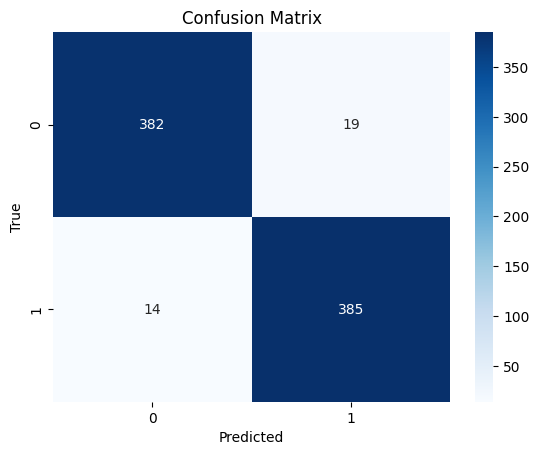

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.96      0.95      0.96       401
           1       0.95      0.96      0.96       399

    accuracy                           0.96       800
   macro avg       0.96      0.96      0.96       800
weighted avg       0.96      0.96      0.96       800



In [ ]:
import pandas as pd

# Assuming X_test and y_test are in pandas DataFrame and Series
errors = X_test[(predictions != y_test)]
errors['predicted'] = predictions[(predictions != y_test)]
errors['actual'] = y_test[(predictions != y_test)]

print(errors.head())  # Display first few error cases


          Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
70    0.610132 -3.460819   1.336759     0.387452  -0.136781  2.988646   
803  -1.071853 -1.496799  -0.303023     1.425078   2.183076  1.532804   
1822  0.622759 -4.196353   0.847013     0.431259  -0.302134  3.726932   
1992 -2.585616 -0.045807   0.870952    -0.136893  -0.037032  1.071864   
33   -0.588796 -1.121987   2.324295     0.311931   5.148739 -3.351988   

       Acidity  predicted  actual  
70   -2.044769          1       0  
803   1.433817          0       1  
1822 -1.188430          1       0  
1992  1.500015          0       1  
33    5.560109          1       0  


<ipython-input-5-ea3ecbc74afb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors['predicted'] = predictions[(predictions != y_test)]
<ipython-input-5-ea3ecbc74afb>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors['actual'] = y_test[(predictions != y_test)]


,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,predicted,actual
70,0.610132,-3.460819,1.336759,0.387452,-0.136781,2.988646,-2.044769,1,0
1822,0.622759,-4.196353,0.847013,0.431259,-0.302134,3.726932,-1.188430,1,0
33,-0.588796,-1.121987,2.324295,0.311931,5.148739,-3.351988,5.560109,1,0
3194,0.026097,3.010306,1.712530,1.754225,0.468184,-2.160814,4.902217,1,0
1731,1.416978,-0.450989,-2.499578,1.900472,1.729655,2.024357,-2.657512,1,0
598,0.080971,0.311422,2.102265,1.284845,1.434369,-3.740368,1.050908,1,0
2758,-3.615633,-0.425489,1.209044,0.515604,1.166596,-1.149619,-2.789929,1,0
3225,2.849105,-0.810499,-1.769152,0.863339,1.332378,0.049158,1.185050,1,0
2053,0.302576,-2.011767,1.900143,0.533090,1.703285,1.261360,-0.449605,1,0
2256,0.481871,2.273680,-1.456168,2.452204,0.046173,-1.234474,-1.005574,1,0


RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

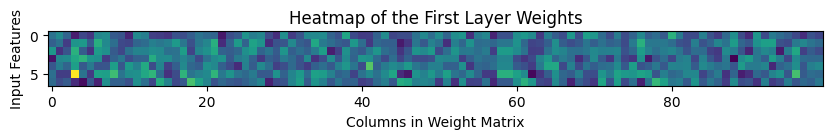

In [ ]:
#Visualization of first layer weights. Probably not super valuable.
fig, ax = plt.subplots(figsize=(10, 8))
ax.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.title('Heatmap of the First Layer Weights')
plt.xlabel('Columns in Weight Matrix')
plt.ylabel('Input Features')
plt.colorbar()
plt.show()


In [ ]:
#Let's try some hyperparameter tuning
#This gives great results. Messing around with max_iter is important.
#Maybe randomforestclassifier caps out around 91% or something.
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

# It's often a good practice to scale your data for neural network models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
for x in range(50, 1000, 50):
  # Initialize MLPClassifier
  # This is a basic setup. You might need to tune the hyperparameters like hidden_layer_sizes, learning_rate_init, etc.
  mlp = MLPClassifier(hidden_layer_sizes=(x,), max_iter=2000, activation='relu', solver='adam', random_state=42)

  # Fit the model
  mlp.fit(X_train_scaled, y_train)

  # Make predictions
  predictions = mlp.predict(X_test_scaled)

  # Evaluate the model
  print(x)
  accuracy = accuracy_score(y_test, predictions)
  print(f"Model accuracy: {accuracy:.2f}")

50
Model accuracy: 0.93
100
Model accuracy: 0.96
150
Model accuracy: 0.95


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


200
Model accuracy: 0.95
250
Model accuracy: 0.95
300
Model accuracy: 0.96
350
Model accuracy: 0.95
400
Model accuracy: 0.95
450
Model accuracy: 0.95
500
Model accuracy: 0.95
550
Model accuracy: 0.95
600
Model accuracy: 0.95
650
Model accuracy: 0.95
700
Model accuracy: 0.95


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


750
Model accuracy: 0.96


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


800
Model accuracy: 0.91


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


850
Model accuracy: 0.95


In [ ]:
#Let's try some hyperparameter tuning
#This gives great results. Messing around with max_iter is important.
#Maybe randomforestclassifier caps out around 91% or something.
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

# It's often a good practice to scale your data for neural network models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
for x in range(1000, 5000, 250):
  # Initialize MLPClassifier
  # This is a basic setup. You might need to tune the hyperparameters like hidden_layer_sizes, learning_rate_init, etc.
  mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=x, activation='relu', solver='adam', random_state=42)

  # Fit the model
  mlp.fit(X_train_scaled, y_train)

  # Make predictions
  predictions = mlp.predict(X_test_scaled)

  # Evaluate the model
  print(x)
  accuracy = accuracy_score(y_test, predictions)
  print(f"Model accuracy: {accuracy:.2f}")

In [ ]:
#It seems like max_iter and hidden_layer_sizes are basically optimized.
#I want to see what happens if I take out some outliers.

In [ ]:
#Let's mess around with getting rid of outliers.
import pandas as pd
from scipy.stats import zscore

df = data

z_scores = df.apply(zscore)

# Filter rows where any feature's Z-score is greater than 3
filtered_df = df[(z_scores.abs() <= 2.5).all(axis=1)]

In [ ]:
data.shape

In [ ]:
filtered_df.shape

In [ ]:
features = filtered_df[['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']]
target = filtered_df['Good']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [ ]:
#This gives great results. Messing around with max_iter is important.
#Maybe randomforestclassifier caps out around 91% or something.
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# It's often a good practice to scale your data for neural network models
scaler = StandardScaler()
poly = PolynomialFeatures(degree=2)
X_train = scaler.fit_transform(X_train)
X_train = poly.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_test = poly.transform(X_test)

# Initialize MLPClassifier
# This is a basic setup. You might need to tune the hyperparameters like hidden_layer_sizes, learning_rate_init, etc.
mlp = MLPClassifier(hidden_layer_sizes=(100,), alpha=0.0001, max_iter=2000, activation='relu', solver='adam', random_state=42)

# Fit the model
mlp.fit(X_train_scaled, y_train)

# Make predictions
predictions = mlp.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Model accuracy: {accuracy: f}")

Model accuracy:  0.932500


In [ ]:
#Tried with a variety of z scores outlier elimination. Nothing really worked.
#experimented with solver, activation, max_iter, and hidden_layer_sizes values. Can't seem to find anything to beat it.

In [ ]:
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': 'relu',
    'solver': 'adam',
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [ ]:
data.shape

In [ ]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train, y_train)

In [ ]:
means = clf.cv_results_['mean_test_score']

In [ ]:
# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# It's often a good practice to scale your data for neural network models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize MLPClassifier
# This is a basic setup. You might need to tune the hyperparameters like hidden_layer_sizes, learning_rate_init, etc.
mlp = MLPClassifier(hidden_layer_sizes=(100,), alpha=0.0002, max_iter=2000, activation='relu', solver='adam', random_state=42)

# Fit the model
mlp.fit(X_train_scaled, y_train)

# Make predictions
predictions = mlp.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Model accuracy: {accuracy: f}")


In [ ]:
#MinMax Scaling doesn't seem to work at all. Neither did Robust Scaling, which makes sense.
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# It's often a good practice to scale your data for neural network models
scaler = StandardScaler()

# Initialize PCA - Let's start with using 5 components
pca = PCA(n_components=7)

# Combine the scaler and PCA in a pipeline
preprocessing_pipeline = Pipeline([
    ('scaler', scaler),
    ('pca', pca)
])

# Apply the preprocessing pipeline to training and test data
X_train_prepared = preprocessing_pipeline.fit_transform(X_train)
X_test_prepared = preprocessing_pipeline.transform(X_test)

# Initialize MLPClassifier
# This is a basic setup. You might need to tune the hyperparameters like hidden_layer_sizes, learning_rate_init, etc.
mlp = MLPClassifier(hidden_layer_sizes=(100,), alpha=0.0002, max_iter=2000, activation='relu', solver='adam', random_state=42)

# Fit the model
mlp.fit(X_train_prepared, y_train)

# Make predictions
predictions = mlp.predict(X_test_prepared)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Model accuracy: {accuracy:.4f}")


In [ ]:
#Nerp. PolynomialFeatures didn't work.

In [ ]:
#This gives great results. Messing around with max_iter is important.
#Maybe randomforestclassifier caps out around 91% or something.
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

# It's often a good practice to scale your data for neural network models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize MLPClassifier
# This is a basic setup. You might need to tune the hyperparameters like hidden_layer_sizes, learning_rate_init, etc.
for x in range(10):
    mlp = MLPClassifier(hidden_layer_sizes=(100), alpha=0.0002, max_iter=2000, activation='relu', solver='adam', random_state=42 + x)

    # Fit the model
    mlp.fit(X_train_scaled, y_train)

    # Make predictions
    predictions = mlp.predict(X_test_scaled)

    # Evaluate the model
    accuracy = accuracy_score(y_test, predictions)
    print(f"Model accuracy: {accuracy: f}")

#Maybe everything is meaningless and my life is a lie. Maybe we spend our lives chasing imaginary stories and false patterns.
#Maybe part of the trick of life is deluding yourself into thinking you're moving somewhere, when we're all just tilting at windmills.


Model accuracy:  0.958750


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Model accuracy:  0.907500
Model accuracy:  0.952500
Model accuracy:  0.941250
Model accuracy:  0.941250
Model accuracy:  0.956250
Model accuracy:  0.943750
Model accuracy:  0.937500
Model accuracy:  0.950000
Model accuracy:  0.956250


In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
# Create the model
model = tf.keras.Sequential([
                      tf.keras.layers.Dense(128, activation='relu'),
                  tf.keras.layers.Dense(512, activation='relu'),
                 tf.keras.layers.Dense(512, activation='relu'),
                  tf.keras.layers.Dense(1, activation='sigmoid')
 ])
# Compile the model
model.compile(loss="binary_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])
# Fit the model
history = model.fit(X_train,
                    y_train,
                    epochs=500,
                    validation_data=(X_test, y_test),
                    verbose=0)
model.evaluate(X_test_scaled, y_test)


25/25 [==============================] - 0s 2ms/step - loss: 4.2672 - accuracy: 0.7275


[4.267166614532471, 0.7275000214576721]

In [ ]:
#data augmentation
#Obvious note for a noob: If it performs at 28% accuracy on the training data, it's not trained.

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import numpy as np
from sklearn.utils import shuffle

# It's often a good practice to scale your data for neural network models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize MLPClassifier
# This is a basic setup. You might need to tune the hyperparameters like hidden_layer_sizes, learning_rate_init, etc.
mlp = MLPClassifier(hidden_layer_sizes=(100), alpha=0.0002, max_iter=4000, activation='relu', solver='adam', random_state=42)


def augment_data(X, method='noise', noise_level=0.01, jitter_factor=0.01):
    if method == 'noise':
        noise = noise_level * np.random.randn(*X.shape)
        return X + noise
    elif method == 'jitter':
        jitter = np.random.uniform(-jitter_factor, jitter_factor, X.shape)
        return X + jitter * X
    elif method == 'scaling_shifting':
        scaling_factor = np.random.uniform(0.9, 1.1, X.shape[1])
        shifting_factor = np.random.uniform(-0.1, 0.1, X.shape[1])
        return X * scaling_factor + shifting_factor
    else:
        return X

# Augment data
X_train_augmented = augment_data(X_train_scaled, method='scaling_and_shifting')

X_train_augmented = np.vstack([X_train_scaled, X_train_augmented])

y_train_augmented = np.hstack([y_train, y_train])  # Duplicate y_train

# Shuffle the augmented dataset
X_train_augmented, y_train_augmented = shuffle(X_train_augmented, y_train_augmented)

# Fit model on augmented data
mlp.fit(X_train_augmented, y_train_augmented)

# Make predictions
predictions = mlp.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Model accuracy: {accuracy: f}")

Model accuracy:  0.950000
